# Linear Regression
# STAT318/462 Lab 2
In this lab you will work through Section 3.6 of the course textbook, An Introduction to Statistical Learning (there is a link to this textbook on the Learn page). The R code from Section 3.6 is given below. We will not be covering anova in section 3.6.5 and we will not be writing functions as in section 3.6.7.

# Libraries
We will beusing the statsmodels to run linear regression and pandas to load the dataset we will be using.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simple Linear Regression

The Boston data set has median house values for 506 neighborhoods around Boston. We will seek to predict this using the accompanying 13 predictors such as
 - rm (average number of rooms per house),
 - age (average age of houses),
 - lstat (percent of households with low socioeconomic status).


In [ ]:
boston = pd.read_csv("Boston.csv") 
boston.head()

The variable names are shown below. Note that the “target” variable (median house price) is the last column.

In [56]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

We shall begin by using the ```ols()``` function. This will fit a linear model using a descriptive formula of how to perform the modelling. The formula reads “predict medv from lstat”

In [57]:
from statsmodels.formula.api import ols

We can print a summary of the model using ```.summary()```.

In [59]:
lr = ols(formula = 'medv ~ lstat', data = boston).fit()
lr.summary()

It is generally better to use existing functions to extract information out of models. ```.param``` return the model’s regression coefficients.

In [12]:
lr.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

```.conf_int()``` return the model’s confidence intervals for the regression coefficients. ```alpha=0.05``` get s the 95% confindance intervals.

In [65]:
lr.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [ ]:
lr.predict([5, 10, 15])

We will now plot **medv** and **lstat** along with the model line using the ```.plot.scatter()``` which is the same as ```plt.scatter()``` but we can acess the dataframe names using their keys, and ```.plot()``` to plot the regression line.

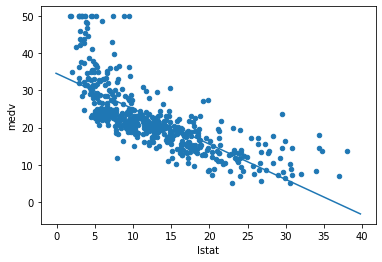

In [68]:
ax = boston.plot.scatter("lstat", "medv")

intercept = lr.params[0]
slope = lr.params[1]

x = np.array(ax.get_xlim())
y = intercept + slope * x
ax.plot(x, y)

You may feel there is some non-linearity in the relationship between lstat and medv. We will explore this issue later in this lab.

Below we experiment with some additional settings for plotting lines and points.

```linewidth``` parameter deals with line width

```marker``` deals with plotting symbols

```color``` parameter deals with colours

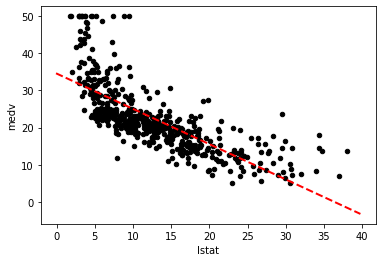

In [14]:
ax = boston.plot.scatter("lstat", "medv", color="black")
ax.plot(x, y, color='red', linestyle='dashed', linewidth=2)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

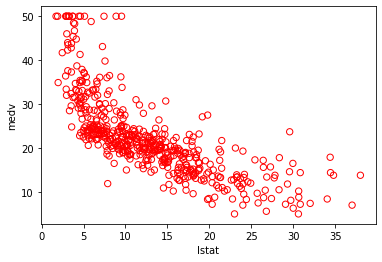

In [15]:
boston.plot.scatter("lstat", "medv", s=40, marker='o', fc='none', ec='red')

In [ ]:
boston.plot.scatter("lstat", "medv", s=4)

In [ ]:
boston.plot.scatter("lstat", "medv", s=40, marker="+")

In [ ]:
markers = list(".,ov^><12348spP*hH+xXDd|_") + list(range(12))

for i, m in enumerate(markers):
    plt.scatter(i, i, marker=m, s=50, c="black")

# Multiple Linear Regression

Previously we had many predictor variables but we chose to just use lstat. Now we will use more than one predictor variable. Again we will use the lm() function but now we need to create a different formula.
 The syntax ```y∼x1+x2+x3``` is used to fit a model with three predictors: x1, x2, and x3. The summary() function will now output the regression coefficients for all these predictors.

We shall add the predictor age

In [ ]:
lr = ols(formula = 'medv ~ lstat + age', data = boston).fit()
lr.summary()

The Boston data set has 13 predictors, so it would be tedious to have to name all thirteen. There is no simple short hand to include them all so we can uses ```" + ".join()``` to join them and uses a set remove ot remove the target varible.

In [ ]:
formula = "medv ~ " + " + ".join(set(boston.columns) - {"medv"})

lr = ols(formula=formula, data=boston).fit()
lr.summary()

More varibles can be subtraed by including them in the remove set. Here we will remove age.

In [ ]:
formula = "medv ~ " + " + ".join(set(boston.columns) - {"medv", "age"})

lr = ols(formula=formula, data=boston).fit()
lr.summary()

# Interaction Terms
Interaction terms are additional variables that result from product-combinations of the existing variables. The formula has a short-hand style for describing interactions.

The formula syntax lstat:black is an interaction term between lstat and black.


### numeric : numeric

Suppose a = \[1,2,3,4\] and b = \[11,12,13,14\]
 
The formula “a:b” would be \[11, 24, 39, 56\]

i.e. a × b

i.e. \[1×11, 2×12, 3×13, 4×14\] i.e. \[(11, 24, 56\]


### numeric : factor

Suppose a = c(1,2,3,4) and b = \[“Y”,“N”,“N”,“Y”\]

The formula “a:b” would produce two numeric columns called: “a:Y” and “a:N” (two because b has 
two levels: Y & N)
 
 a:Y is \[1, 0, 0, 4\]
 
 a:N is \[0, 2, 3, 0\]


### factor : factor

Suppose a = \[“Green”, “Green”, “Yellow”, “Blue”\] and b = \[“Y”,“N”,“N”,“Y”\]

The formula “a:b” would produce a single factor column: “a:b”"

a:b is \[“Green.Y”, “Green.N”, “Yellow.N”, “Blue.Y”\]

The formula syntax lstat*age simultaneously includes lstat, age, and the interaction term lstat × age as predictors; it is a shorthand for lstat+age+lstat:age

In [ ]:
lr = ols(formula = 'medv ~ lstat * age', data = boston).fit()
lr.summary()

In [ ]:
lr = ols(formula = 'medv ~ lstat + I(lstat ** 2)', data = boston).fit()
lr.summary()

In [ ]:
def poly(x, p):
    x = np.array(x)
    x = np.transpose(np.vstack((x ** k for k in range(p + 1))))
    x = np.linalg.qr(x)[0][:, 1:]
    return x

lr = ols(formula = 'medv ~ poly(lstat, 5)', data = boston).fit()
lr.summary()

In [ ]:
lr = ols(formula = 'medv ~ np.log(rm)', data = boston).fit()
lr.summary()

In [ ]:
carseats = pd.read_csv("Carseats.csv") 
carseats.columns

In [ ]:
formula = "Sales ~ "

# Including all
formula += " + ".join(set(carseats.columns) - {"Sales"})

# Interaction terms
formula += "+Income:Advertising+Price:Age" 
    
lr = ols(formula = formula, data = carseats).fit()
lr.summary()

In [ ]:
from patsy.contrasts import Treatment
carseats["ShelveLoc"]
# contrast = Treatment(reference=0).code_without_intercept()
# contrast.matrix

<AxesSubplot:xlabel='lstat', ylabel='medv'>

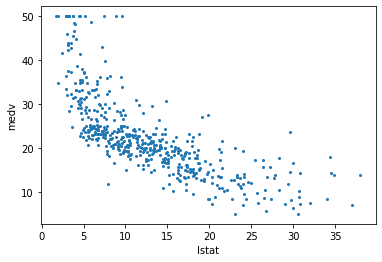

<AxesSubplot:xlabel='lstat', ylabel='medv'>

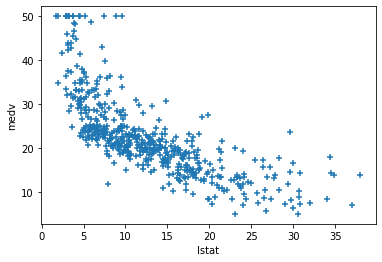

In [17]:
boston.plot.scatter("lstat", "medv", s=40, marker="+")

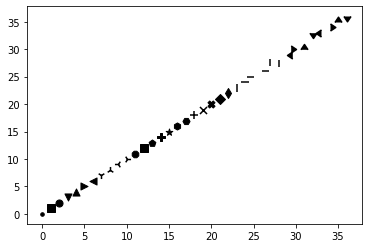

In [18]:
markers = list(".,ov^><12348spP*hH+xXDd|_") + list(range(12))

for i, m in enumerate(markers):
    plt.scatter(i, i, marker=m, s=50, c="black")

# Multiple Linear Regression

Previously we had many predictor variables but we chose to just use lstat. Now we will use more than one predictor variable. Again we will use the lm() function but now we need to create a different formula.
 The syntax ```y∼x1+x2+x3``` is used to fit a model with three predictors: x1, x2, and x3. The summary() function will now output the regression coefficients for all these predictors.

We shall add the predictor age

In [78]:
lr = ols(formula = 'medv ~ lstat + age', data = boston).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.98e-88
Time:                        13:10:44   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Boston data set has 13 predictors, so it would be tedious to have to name all thirteen. There is no simple short hand to include them all so we can uses ```" + ".join()``` to join them and uses a set remove ot remove the target varible.

In [31]:
formula = "medv ~ " + " + ".join(set(boston.columns) - {"medv"})

lr = ols(formula=formula, data=boston).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        12:30:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
age            0.0007      0.013      0.052      0.958      -0.025       0.027
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
rad            0.3060      0.066      4.613      0.000       0.176       0.436
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
chas           2.6867      0.862      3.118      0.002       0.994       4.380
rm             3.8099      0.418      9.116      0.000       2.989       4.631
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

More varibles can be subtraed by including them in the remove set. Here we will remove age.

In [80]:
formula = "medv ~ " + " + ".join(set(boston.columns) - {"medv", "age"})

lr = ols(formula=formula, data=boston).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          6.08e-136
Time:                        13:13:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
rad            0.3058      0.066      4.627      0.000       0.176       0.436
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
black          0.0093      0.003      3.481      0.001       0.004       0.015
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
chas           2.6890      0.860      3.128      0.002       1.000       4.378
rm             3.8144      0.408      9.338      0.000       3.012       4.617
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interaction Terms
Interaction terms are additional variables that result from product-combinations of the existing variables. The formula has a short-hand style for describing interactions.

The formula syntax lstat:black is an interaction term between lstat and black.


### numeric : numeric

Suppose a = \[1,2,3,4\] and b = \[11,12,13,14\]
 
The formula “a:b” would be \[11, 24, 39, 56\]

i.e. a × b

i.e. \[1×11, 2×12, 3×13, 4×14\] i.e. \[(11, 24, 56\]


### numeric : factor

Suppose a = c(1,2,3,4) and b = \[“Y”,“N”,“N”,“Y”\]

The formula “a:b” would produce two numeric columns called: “a:Y” and “a:N” (two because b has 
two levels: Y & N)
 
 a:Y is \[1, 0, 0, 4\]
 
 a:N is \[0, 2, 3, 0\]


### factor : factor

Suppose a = \[“Green”, “Green”, “Yellow”, “Blue”\] and b = \[“Y”,“N”,“N”,“Y”\]

The formula “a:b” would produce a single factor column: “a:b”"

a:b is \[“Green.Y”, “Green.N”, “Yellow.N”, “Blue.Y”\]

The formula syntax lstat*age simultaneously includes lstat, age, and the interaction term lstat × age as predictors; it is a shorthand for lstat+age+lstat:age

In [81]:
lr = ols(formula = 'medv ~ lstat * age', data = boston).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           4.86e-88
Time:                        13:13:30   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
lr = ols(formula = 'medv ~ lstat + I(lstat ** 2)', data = boston).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          1.56e-112
Time:                        12:31:33   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
def poly(x, p):
    x = np.array(x)
    x = np.transpose(np.vstack((x ** k for k in range(p + 1))))
    x = np.linalg.qr(x)[0][:, 1:]
    return x

lr = ols(formula = 'medv ~ poly(lstat, 5)', data = boston).fit()
lr.summary()

c:\users\zmt11\.conda\envs\lit_review\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          8.73e-122
Time:                        12:31:33   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5328      0.232     97.197      0.000      22.077      22.988
poly(lstat, 5)[0]  -152.4595      5.215    -29.236      0.000    -162.705    -142.214
poly(lstat, 5)[1]   -64.2272      5.215    -12.316      0.000     -74.473     -53.982
poly(lstat, 5)[2]   -27.0511      5.215     -5.187      0.000     -37.297     -16.805
poly(lstat, 5)[3]    25.4517      5.215      4.881      0.000      15.206      35.697
poly(lstat, 5)[4]    19.2524      5.215      3.692      0.000       9.007      29.498
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lr = ols(formula = 'medv ~ np.log(rm)', data = boston).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.22e-64
Time:                        12:31:34   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
carseats = pd.read_csv("Carseats.csv") 
carseats.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [49]:
formula = "Sales ~ "

# Including all
formula += " + ".join(set(carseats.columns) - {"Sales"})

# Interaction terms
formula += "+Income:Advertising+Price:Age" 
    
lr = ols(formula = formula, data = carseats).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          6.14e-166
Time:                        12:40:04   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
from patsy.contrasts import Treatment
carseats["ShelveLoc"]
# contrast = Treatment(reference=0).code_without_intercept()
# contrast.matrix

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object